<a href="https://colab.research.google.com/github/ilitteri/7512-AnalisisNumerico/blob/main/tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=1tRDUEoKUNx1abmyV9QE0aHgo5Nt2-TN8" style="display: block;margin-left: auto;margin-right: auto;width: 75%;"></img>

<h1 align="center">[75.12] Análisis Numérico</h1>
<h1 align="center">Trabajo Práctico 1</h1>
<h2 align="center">1<sup>er</sup> Cuatrimestre 2021</h2>

--- 

<h1 align="center" style="font-weight:bold;">Búsqueda de raíces</h1>

---

<h3 align="left"><ins>AUTOR<ins></h3>
<p>Sánchez, Juan Pablo (jpsanchez@fi.uba.ar) - 105.865</p>
<p>de Luca Andrea, Felipe (fdeluca@fi.uba.ar) - 105.646</p>
<p>Litteri, Iván (ilitteri@fi.uba.ar - 106.223</p>
    
<h3 align="left"><ins>CÁTEDRA<ins></h3>
<p>Sassano</p>

<h3 align="left"><ins>FECHA DE ENTREGA<ins></h3>
<p>26 de mayo del 2021</p>

<h3 align="left"><ins>LENGUAJE ELEGIDO<ins></h3>
<p>Python</p>

<h3 align="left"><ins>CALIFICACIÓN<ins></h3>
<p></p>

---

*Es importante correr todos los bloques de código si se quiere visualizar algún resultado ya que algunos dependen de bloques previos.*

In [129]:
import numpy as np
from sympy import *
from matplotlib import pyplot as plt
from scipy import optimize
import matplotlib.ticker as mticker
np.seterr('raise')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [130]:
# Función auxiliar para imprimir iteraciones
def imprimir_iteraciones(iteraciones, cant_semillas = 1, n_mostrar = 0):
  print("#\t\t\t Valor calculado\t\t Variación respecto al anterior")
  print(*[f"Semilla   {x}\t\t"+f"{iteraciones[x] : 1.20f}"[:18] for x in range (0, cant_semillas)], sep = '\n')
  print(*[f"Iteracion {x}\t\t"+f"{iteraciones[x] : 1.20f}"[:18]+"\t\t"+f"{abs(iteraciones[x-1] - iteraciones[x]) : 1.20f}"[:18] for x in range(cant_semillas, len(iteraciones))], sep = '\n')

# Función auxiliar para obtener la tolerancia al considerar un número 0. Tipo debe ser np.float32 o np.float64
def tol_cero(tipo):
  return np.float32(2)**np.float32(-120) if tipo == np.float32 else np.float64(2)**np.float64(-1000)

# 1. Métodos para seres queridos

En el marco de la época de la pandemia poder ayudar a los seres queridos es lo más importante que podemos hacer.

## (a) Buscar la forma de implementar un método visto en clase para ayudar o apoyar a un ser querido. De no ser posible dar un ejemplo de un uso de los métodos vistos en clase para el área en que se desarrollen profesionalmente.

<p align = "justify">Ayudamos a un familiar a la hora de ajustar el volumen del celular para poder ver una película. Decidimos emplear el método de bisección para hallar el volumen adecuado.</p>

<p align = "justify">El método consiste en obtener, mediante un intervalo ($\tau$), una raíz definida como cero en el método. Para ello, necesitamos conocer si existe un cambio de signo en el mismo, de lo contrario no podemos garantizar la existencia de la raíz buscada. En caso de no encontrarla, se divide el intervalo en dos y se vuelve a evaluar el cambio de signo antedicho.  El proceso debe repetirse hasta mejorar la aproximación, de acuerdo con el error que estemos dispuestos a aceptar.</p>

Como raíz o cero tomamos

  $$\text{raíz o cero = volúmen adecuado}$$

en donde nuestra función es

$$f(x) = \text{volúmen del celular}$$

Para la comprobación por el método de Bolzano

\begin{equation}
  f(\text{volúmen bajo}) < 0 \text{ y } f(\text{volúmen alto}) > 0
  \quad (\rho)
\end{equation}

<p align="center">
  <img src="https://drive.google.com/uc?id=1Ed1kNsViy5IkQBlv0gQpIigWmoLAER6H" style="display: block;margin-left: auto;margin-center: auto;width: 50%;">
    <figcaption>
      <cite>
        <p align = "justify">Fig.1 En naranja y amarillo se ve el máximo y mínimo del diálogo. La segunda vez que preguntamos vemos el volumen en verde, en magenta el valor requerido por el usuario.</p>
      </cite>
    </figcaption>
  </img>
</p>

<p align = "justify">Con lo cual, por lo dicho en ($\rho$) debemos obtener un valor que no necesariamente se encuentre en el medio, ya que dependerá de la subjetividad del usuario en cuestión, pero que por el Teorema del Valor Intermedio sabemos que debe existir dentro del intervalo que poseemos.</p>

Dicho esto, procederemos a preguntar:

- *¿El volumen está muy alto o bajo?* ($\lambda$)
- *Muy alto*

> Bajamos el volumen y volvemos a preguntar ($\lambda$)

- *Muy bajo*

> <p align = "justify"> Vemos entonces la definición del intervalo que buscábamos ($\tau$) para aplicar el método que necesitamos. Como quedan dos intervalos (el primero, y el definido en el diálogo, lógicamente comprendido en el anterior) chequeamos cada uno por separado. Por ende, subimos y/o bajamos el volumen del teléfono y volvemos a preguntar.</p>

> Lo haremos tantas veces como haga falta y de esa forma hallaremos el volumen adecuado.

<p align = "justify">Respecto al error, el mismo queda limitado por la cantidad de divisiones que posea la escala de volúmenes en el teléfono, con lo cual no podremos controlar ese aspecto.</p>

## (b) Comentar la experiencia.

<p align = "justify">Se nos ocurrió esta idea ya que hace unos meses uno de los integrantes del grupo estaba ayudando a su abuela a usar su teléfono, siendo que ella no lo sabe utilizar muy bien.</p>

<p align = "justify">En ese entonces, ella había estado recibiendo llamados pero tenía el teléfono silenciado y no se acordaba como subirle el volumen, por lo que me pidio ayuda ya que había pasado por su casa a dejarle unas cosas.</p>

<p align = "justify">La experiencia fue muy similar a lo expresado anteriormente: puse un video de youtube para poder ir testeando el sonido, lo puse a la mitad y le pregunté si estaba muy alto o muy bajo. Así una o dos veces más y se lo deje, no tuvo más inconviententes. </p>




# 2. Hallar $\pi$ por dos caminos


## (a) Algoritmos de Newton-Raphson

In [131]:
# Realiza las cuentas con y devuelve el mismo tipo de dato que tiene la semilla
def nr(funcion, derivada, semilla, max_iter = 10000, err = 0):
  tolerancia_cero = tol_cero(type(semilla))
  lista = [semilla]
  for i in range(1, max_iter):
    divisor = derivada(lista[-1])
    if (abs(divisor) < tolerancia_cero):
        raise ZeroDivisionError
    
    lista.append(lista[-1] - funcion(lista[-1])/divisor)
    if (abs(lista[i - 1] - lista[i]) <= err):
      break

  return np.array(lista)

## (b) Algoritmo de Leibniz

In [132]:
def leibniz(iteraciones, tipo):
    pi = tipo(0.0)
    signo = tipo(1.0)
    for iteracion in range(1, iteraciones, 2):
        pi += signo / tipo(iteracion)
        signo *= tipo(-1.0)
  
    return pi * tipo(4)

## (c) Ejecutar los algoritmos anteriores con iteraciones $n=10, n=100, n=1000, n=10000, n=100000$ utilizando una representación de punto flotante de $32$ bits.

In [133]:
ITERACIONES = [10, 100, 1000, 10000, 100000]

### Con Newton-Raphson

In [134]:
  iteraciones_32 = nr(lambda x : np.sin(x), lambda x : np.cos(x), np.float64(3))

  print("Con punto flotante de 32 bits:")
  imprimir_iteraciones(iteraciones_32)

Con punto flotante de 32 bits:
#			 Valor calculado		 Variación respecto al anterior
Semilla   0		 3.000000000000000
Iteracion 1		 3.142546543074277		 0.142546543074277
Iteracion 2		 3.141592653300476		 0.000953889773800
Iteracion 3		 3.141592653589793		 0.000000000289316
Iteracion 4		 3.141592653589793		 0.000000000000000


> No hicimos las siguientes iteraciones ya que el valor permanecía invariante desde la $4^{ta}$ iteración

### Con Leibniz

In [135]:
print(*[f'{x} iteraciones: {leibniz(x, np.float32)}' for x in ITERACIONES], sep = '\n')

10 iteraciones: 3.3396823406219482
100 iteraciones: 3.121594190597534
1000 iteraciones: 3.1395931243896484
10000 iteraciones: 3.14139723777771
100000 iteraciones: 3.141575813293457


## (d) Ejecutar los algoritmos anteriores con iteraciones $n=10, n=100, n=1000, n=10000, n=100000$ utilizando una representación de punto flotante de $64$ bits.

### Con Newton-Raphson

In [136]:
  iteraciones_64 = nr(lambda x : np.sin(x), lambda x : np.cos(x), np.float64(3))
  print("Con punto flotante de 64 bits:")
  imprimir_iteraciones(iteraciones_64)

Con punto flotante de 64 bits:
#			 Valor calculado		 Variación respecto al anterior
Semilla   0		 3.000000000000000
Iteracion 1		 3.142546543074277		 0.142546543074277
Iteracion 2		 3.141592653300476		 0.000953889773800
Iteracion 3		 3.141592653589793		 0.000000000289316
Iteracion 4		 3.141592653589793		 0.000000000000000


> No hicimos las siguientes iteraciones ya que el valor permanecía invariante desde la $4^{ta}$ iteración

### Con Leibniz

In [137]:
print(*[f'{x} iteraciones: {leibniz(x, np.float64)}' for x in ITERACIONES], sep = '\n')

10 iteraciones: 3.3396825396825403
100 iteraciones: 3.121594652591011
1000 iteraciones: 3.139592655589785
10000 iteraciones: 3.141392653591791
100000 iteraciones: 3.1415726535897814


## (e) Ejecutar los programas solicitados en a y b con una calculadora (aclarar marca y modelo) y comparar las respuestas obtenidas con $n = 10, n = 100, n = 1000, n = 10000$ y $n = 100000$ (en caso de no alcanzar la memoria de la calculadora utilizar el máximo $n$ posible).

Para realizar este item utilizamos una calculadora CASIO fx-991ES PLUS. Cuenta con las siguientes especificaciones:
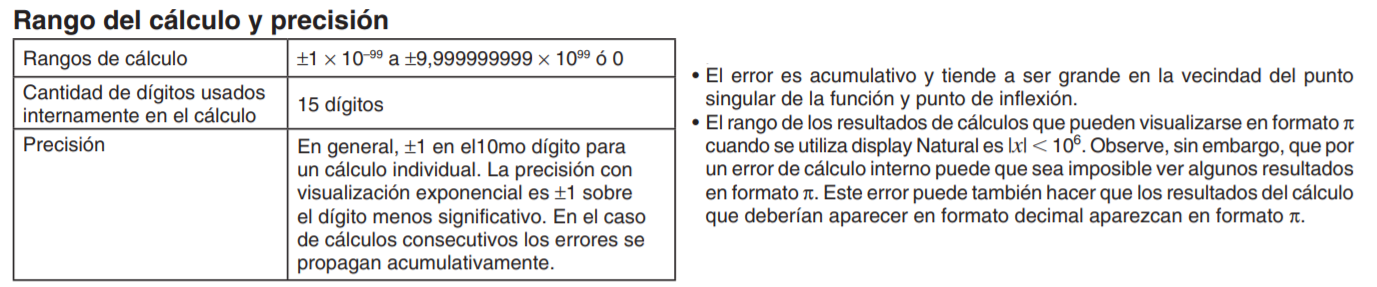

### Con Newton-Raphson

Se obtuvieron los siguientes resultados:


*   $p_0 = 3$
*   $p_1 = 3.142546543$
*   $p_2 = 3.141592653$
*   $p_3 = \pi = 3.141592654$

<p align = "justify">A partir de las siguientes iteraciones la calculadora continuaba mostrando $\pi$, siendo el error tan pequeño que esta ya no podía diferenciarlo de acuerdo a sus especificaciones.</p>


### Con Leibniz

Se obtuvieron los siguientes resultados:
*   $p_0 = 1$
*   $p_1 = \frac{2}{3}$
*   $p_{10} = 0.8080789524$
*   $p_{100} = 0.7878733593$
*   $p_{1000} = 0.7856479136$
*   $p_{10000} = 0.7854231609$
*   $p_{100000} = 0.7854006633$

<p align = "justify">Aclaración: La serie de Leibniz converge a $\frac{1}{4}\pi$ y en este caso se calculó sin multiplicar el valor por 4. Por comodidad, el valor real de este número es $\frac{1}{4}\pi = 0.7853981634 \pm 0.0000000001$.</p>

<p align = "justify">Se puede notar que al llegar a $100000$ iteraciones (tras 2 horas calculando), la calculadora acumuló más error del que venía con $10000$.</p>

## (f) Representar las dos respuestas finales obtenidas (para $n = 100000$ y el método de Newton Raphson) en c, d y e de manera de expresarlo como $\pi = \overline{\pi} + ∆\pi$.

### Con punto flotante de 32 bits

<p align = "justify">Las siguientes iteraciones de Newton Raphson ya no variaban, por lo que el error del método ya era más pequeño que el del tipo de dato utilizado en el cálculo. Por lo tanto, el error del resultado será el del tipo de dato.</p>

<p align = "justify">Un punto flotante de 32 bits tiene reservados 23 dígitos para la mantisa, más el dígito implícito, por lo que en base 10 tendrá $log_{10}(2^{24}) \rfloor = 7$ dígitos significativos. Por lo tanto:</p>
 $$\pi = 3.141592 \pm 0.000001$$

### Con punto flotante de 64 bits

<p align = "justify">Nuevamente el error será el de la representación del tipo de dato. Un punto flotante de 64 bits tiene reservados 52 dígitos para la mantisa, más el dígito implícito, por lo que en base 10 tendrá $\log_{10}(2^{53}) \rfloor = 15$ dígitos significativos. Por lo tanto: </p>
$$\pi = 3.14159265358979 \pm 0.00000000000001$$

### Con calculadora CASIO fx-991ES PLUS

<p align = "justify">En este caso, por las mismas razones expresadas anteriormente, el error va a ser el de la calculadora. En este caso, esta especificaba un error de $\pm 1$ en el décimo dígito, es decir, 10 cifras significativas:</p>
$$\pi = 3.141592654 \pm 0.000000001$$

## (g) ¿Podemos afirmar que para la computadora el número $π$ es una constante?


<p align = "justify">Si bien la calculadora guarda el número como una constante, se debería considerar una variable a la hora de calcular el error y su propagación, ya que al ser $\pi$ un número irracional este tiene infinitos dígitos que son imposibles de almacenar en una computadora, y mucho menos hacer cálculos con todos ellos. El error a considerar dependerá de las especificaciones del tipo de dato que se este utilizando para almacenarlo.</p>

# 3. Búsqueda de raíces

$$
f_{1}(x) = x^2 - 2\\
f_{2}(x) = x^5 - 6.6 \cdot x^4 + 5.12 \cdot x^3 +  21.312 \cdot x^2 - 38.016 \cdot x + 17.28\\
f_{3}(x) = (x-1.5) \cdot e^{-4 \cdot (x-1.5)^{2}}
$$

In [138]:
f1 = lambda x : x*x - 2  
f1_der = lambda x : 2*x
f1_der_2 = lambda x : 2
  
f2 = lambda x : x ** 5 - 6.6 * x ** 4 + 5.12 * x ** 3 + 21.312 * x ** 2 - 38.016 * x + 17.28
f2_der = lambda x : 5 * x ** 4 - 26.4 * x ** 3 + 15.36 * x ** 2 + 42.624 * x - 38.016
f2_der_2 = lambda x : 20 * x ** 3 - 79.2 * x ** 2 + 30.72 * x + 42.624

f3 = lambda x : (x - 1.5) * np.exp(-4 * (x - 1.5) ** 2)
f3_der = lambda x : np.exp(-4 * (x - 1.5) ** 2) * ((-8 * x + 12) * (x - 1.5) + 1)
f3_der_2 = lambda x : np.exp(-4 * (x - 1.5) ** 2) * (-24 * x + (x - 1.5) * (8 * x - 12) ** 2 + 36)

In [139]:
INTERVALO = [0, 2]

In [140]:
# CONSTANTES
# Cotas de error
ERRORES = [np.float64(10**-5), np.float64(10**-13)]
# Funciones a evaluar
FUNCIONES = [f1, f2, f3]
FUNCIONES_DER = [f1_der, f2_der, f3_der]
FUNCIONES_DER_2 = [f1_der_2, f2_der_2, f3_der_2]
# Mensajes
STR_ERRORES = ['10^(-5)', '10^(-13)']
STR_FUNCIONES = ['x**2 - 2', 'x**5 - 6.6 * x**4 + 5.12 * x**3 + 21.312 * x ** 2 - 38.016 * x + 17.28', '(x - 1.5) * np.exp(-4 * (x - 1.5)**2)']
# Resultados
resultados_raices = {'biseccion': {}, 'nr': {}, 'nr_mod': {}, 'secante': {}}

In [141]:
# Función auxiliar para foo
def imprimir_raices_de_funciones(algoritmo, raices: dict, semillas, funciones = (1, 2, 3)) -> None:
  cant_semillas = 1
  k = 0
  nombre_metodo = algoritmo.__name__
  for i in funciones:
      for j, e in enumerate(ERRORES):
          print(f'Funcion {STR_FUNCIONES[i-1]} con error de {STR_ERRORES[j]}')
          try:
              if nombre_metodo == 'nr_mod':
                  raices['nr_mod'][f'{i}'] = algoritmo(FUNCIONES[i-1], FUNCIONES_DER[i-1], FUNCIONES_DER_2[i-1], semillas[k], err = e)
              elif nombre_metodo == 'nr':
                  raices['nr'][f'{i}'] = algoritmo(FUNCIONES[i-1], FUNCIONES_DER[i-1], semillas[k], err = e)
              else:
                  raices[nombre_metodo][f'{i}'] = algoritmo(FUNCIONES[i-1], *semillas[k], e)
                  cant_semillas = 2
          except Exception:
              print(f"ERROR: Divisor se hizo 0 al calcular la siguiente iteración\n")
              continue
          imprimir_iteraciones(raices[nombre_metodo][f'{i}'], cant_semillas)
          print("\n")
      k += 1

## (a) Graficar las funciones $f_{1}(x), f_{2}(x), f_{3}(x)$ en el intervalo $[0, 2]$

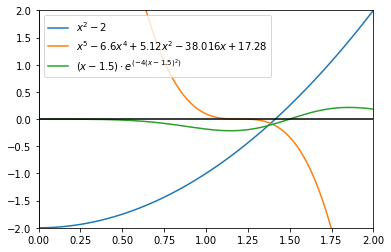

In [142]:
x = np.linspace(0,2,num=1000)

plt.plot(x, list(map(f1, x)), label=r'$x^2 - 2$')
plt.plot(x, list(map(f2, x)), label=r'$x^5 - 6.6x^4 + 5.12x^2 - 38.016x + 17.28$')
plt.plot(x, list(map(f3, x)), label=r'$(x-1.5) \cdot e^{(-4(x-1.5)^{2})}$')

plt.axhline(0, color="black")
plt.axvline(0, color="black")

plt.xlim(INTERVALO)
plt.ylim(-2, 2)

plt.legend()
plt.show()

## (b) Hallar las raices de las funciones $f_{1}(x), f_{2}(x), f_{3}(x)$ en el intervalo $[0, 2]$ con los métodos de  Bisección, Newton-Raphson, Newton-Raphson modificado y Secante.

### Algoritmo de Bisección

In [143]:
def biseccion(funcion, q0, q1, err = 0, max_iter = 10000):
  contador = 1
  lista = [q0, q1]

  while abs(lista[contador] - lista[contador-1]) > err:
    q2 = (q0 + q1) / 2 
    if funcion(q0) * funcion(q2) <= 0:
      q1 = q2
      lista.append(q1)
    else:
      q0 = q2
      lista.append(q0)
    contador = contador + 1
    if (contador >= max_iter):
      break

  return np.array(lista)

### Algoritmo de Newton Raphson Modificado

In [144]:
def nr_mod(funcion, derivada, derivada_2, semilla, err = 0, max_iter = 10000):
  tolerancia_cero = tol_cero(type(semilla))
  lista = [semilla]
  for i in range(1, max_iter):
    divisor = derivada(lista[-1]) ** 2 - funcion(lista[-1]) * derivada_2(lista[-1])
    if (abs(divisor) < tolerancia_cero):
        raise ZeroDivisionError

    lista.append(lista[-1] - funcion(lista[-1]) * derivada(lista[-1]) / divisor)
    if (abs(lista[i - 1] - lista[i]) <= err):
      break

  return np.array(lista)

### Algoritmo de Secante

In [145]:
def secante(f, a, b, error = 0, max_iter = 1000):
    tolerancia_cero = tol_cero(type(a))
    p = [a, b]
    p_n_div = lambda f, n, p: f(p[n-1]) - f(p[n-2])
    p_n = lambda f, n, p: p[n-1] - ((f(p[n-1]) * (p[n-1] - p[n-2])) / (p_n_div(f, n, p)))
    for n in range(2, max_iter-1):
        if (abs(p_n_div(f, n, p)) < tolerancia_cero):
            raise ZeroDivisionError
        p.append(p_n(f, n, p))
        if abs(p[n-1] - p[n]) <= error:
            break

    return np.array(p)

### Por Bisección

In [146]:
imprimir_raices_de_funciones(biseccion, resultados_raices, [(np.float64(0), np.float64(2))] * 3)


Funcion x**2 - 2 con error de 10^(-5)
#			 Valor calculado		 Variación respecto al anterior
Semilla   0		 0.000000000000000
Semilla   1		 2.000000000000000
Iteracion 2		 1.000000000000000		 1.000000000000000
Iteracion 3		 1.500000000000000		 0.500000000000000
Iteracion 4		 1.250000000000000		 0.250000000000000
Iteracion 5		 1.375000000000000		 0.125000000000000
Iteracion 6		 1.437500000000000		 0.062500000000000
Iteracion 7		 1.406250000000000		 0.031250000000000
Iteracion 8		 1.421875000000000		 0.015625000000000
Iteracion 9		 1.414062500000000		 0.007812500000000
Iteracion 10		 1.417968750000000		 0.003906250000000
Iteracion 11		 1.416015625000000		 0.001953125000000
Iteracion 12		 1.415039062500000		 0.000976562500000
Iteracion 13		 1.414550781250000		 0.000488281250000
Iteracion 14		 1.414306640625000		 0.000244140625000
Iteracion 15		 1.414184570312500		 0.000122070312500
Iteracion 16		 1.414245605468750		 0.000061035156250
Iteracion 17		 1.414215087890625		 0.000030517578125
Iter

### Por Newton-Rhapson

In [147]:
imprimir_raices_de_funciones(nr, resultados_raices, [np.float64(1)]*3)

Funcion x**2 - 2 con error de 10^(-5)
#			 Valor calculado		 Variación respecto al anterior
Semilla   0		 1.000000000000000
Iteracion 1		 1.500000000000000		 0.500000000000000
Iteracion 2		 1.416666666666666		 0.083333333333333
Iteracion 3		 1.414215686274509		 0.002450980392156
Iteracion 4		 1.414213562374689		 0.000002123899820


Funcion x**2 - 2 con error de 10^(-13)
#			 Valor calculado		 Variación respecto al anterior
Semilla   0		 1.000000000000000
Iteracion 1		 1.500000000000000		 0.500000000000000
Iteracion 2		 1.416666666666666		 0.083333333333333
Iteracion 3		 1.414215686274509		 0.002450980392156
Iteracion 4		 1.414213562374689		 0.000002123899820
Iteracion 5		 1.414213562373095		 0.000000000001594
Iteracion 6		 1.414213562373094		 0.000000000000000


Funcion x**5 - 6.6 * x**4 + 5.12 * x**3 + 21.312 * x ** 2 - 38.016 * x + 17.28 con error de 10^(-5)
#			 Valor calculado		 Variación respecto al anterior
Semilla   0		 1.000000000000000
Iteracion 1		 1.067039106145254		 0.06703

<p align = "justify">Mientras que con las funciones $f_{1}(x)$ y $f_{2}(x)$ no hubo ningún problema al utilizar el algoritmo de Newton Raphson, la función $ f_{3}(x) = (x-1.5) \cdot e^{-4 \cdot (x-1.5)^{2}} $ da error. Esto se debe a que una derivada de las que el algoritmo evaluó al calcular la siguiente iteración dio nula, lo que fue resultado de que la sucesión diverja. En este caso, esto sucede ya que la semilla no esta lo suficientemente próxima a la raíz (se utiliza raiz = 1 como fue indicado).</p>

<p align = "justify">El método de Newton Raphson se basa en utilizar la iteración por punto fijo de la función $ g(x) = x - \frac{f(x)}{f'(x)} $, ya que si $ g(r) = r $ entonces $\frac{f(r)}{f'(r)} = 0$ por lo que tenemos una raíz de $ f $ ($f'(r) \neq 0$).</p>

<p align = "justify">La raíz de esta función se encuentra en $ r = 1,5 $, y una de las hipótesis utilizadas en la demostración de la convergencia de la iteración de punto fijo
es que para $ \forall x \in [a, b]$, $|g'(x)| < 1$ (unicidad del punto fijo), 
donde $[a, b]$ es el intervalo dentro del cual estamos iterando.</p>

<p align = "justify">En este caso, $g'(x) = 1 - \frac{f'(x)^2 - f(x)f''(x)}{f'(x)^2} = \frac{f(x)f''(x)}{f'(x)^2}$ pero <a href="https://www.wolframalpha.com/input/?i=%28%28x-1.5%29*e%5E%28-4*%28x-1.5%29%5E2%29%29*d%C2%B2%28%28%28x-1.5%29*e%5E%28-4*%28x-1.5%29%5E2%29%29%29%2Fdx%C2%B2%2F%28d%28%28%28x-1.5%29*e%5E%28-4*%28x-1.5%29%5E2%29%29%29%2Fdx%5E2%29%2Cx%3D2"> $g'(1) = -2$</a>, por lo que incluir $ x = 1 $ en este intervalo implica que el método puede no converger.</p>


<p align = "justify">Otra forma de verlo es notar que la expresión de Newton-Rhapson se puede deducir a partir del polinomio de Taylor de $f(x)$ alrededor de un $x_{n}$. En tal caso, $f(x) = f(x_{n}) + f'(x_{n})(x - x_{n}) + \frac{f''(\xi)}{2}(x - x_{n})^2$, con $\xi$ entre $x$ y $x_{n}$. Entonces, si evaluamos la función en la raíz $r$ de $f(x)$ queda $0 = f(r) = f(x_{n}) + f'(x_{n})(r - x_{n}) + \frac{f''(\xi)}{2}(r - x_{n})^2$. El método de Newton-Raphson asume que $x_n$ esta lo suficientemente cerca de $r$ tal que $(r-x_n)^2 << (r-x_n)$ lo que nos permite despreciar el último término del polinomio y asi obtener la expresión $r \approx x_n - \frac{f(x_n)}{f'(x_n)} \Rightarrow x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$. En este caso, la semilla no es lo suficientemente cercana como para que esto se cumpla.</p>

<p align = "justify">Para poder hacere que converja, podemos acercar la semilla un poco (a 1,3):</p>

In [148]:
imprimir_raices_de_funciones(nr, resultados_raices, [np.float64(1.3)], funciones = (3,))

Funcion (x - 1.5) * np.exp(-4 * (x - 1.5)**2) con error de 10^(-5)
#			 Valor calculado		 Variación respecto al anterior
Semilla   0		 1.300000000000000
Iteracion 1		 1.594117647058823		 0.294117647058823
Iteracion 2		 1.492821654209128		 0.101295992849694
Iteracion 3		 1.500002960343984		 0.007181306134856
Iteracion 4		 1.499999999999999		 0.000002960343985


Funcion (x - 1.5) * np.exp(-4 * (x - 1.5)**2) con error de 10^(-13)
#			 Valor calculado		 Variación respecto al anterior
Semilla   0		 1.300000000000000
Iteracion 1		 1.594117647058823		 0.294117647058823
Iteracion 2		 1.492821654209128		 0.101295992849694
Iteracion 3		 1.500002960343984		 0.007181306134856
Iteracion 4		 1.499999999999999		 0.000002960343985
Iteracion 5		 1.500000000000000		 0.000000000000000




### Por Newton-Rhapson Modificado

In [149]:
imprimir_raices_de_funciones(nr_mod, resultados_raices, [np.float64(1)] * 3)

Funcion x**2 - 2 con error de 10^(-5)
#			 Valor calculado		 Variación respecto al anterior
Semilla   0		 1.000000000000000
Iteracion 1		 1.333333333333333		 0.333333333333333
Iteracion 2		 1.411764705882352		 0.078431372549019
Iteracion 3		 1.414211438474870		 0.002446732592517
Iteracion 4		 1.414213562371500		 0.000002123896630


Funcion x**2 - 2 con error de 10^(-13)
#			 Valor calculado		 Variación respecto al anterior
Semilla   0		 1.000000000000000
Iteracion 1		 1.333333333333333		 0.333333333333333
Iteracion 2		 1.411764705882352		 0.078431372549019
Iteracion 3		 1.414211438474870		 0.002446732592517
Iteracion 4		 1.414213562371500		 0.000002123896630
Iteracion 5		 1.414213562373094		 0.000000000001594
Iteracion 6		 1.414213562373095		 0.000000000000000


Funcion x**5 - 6.6 * x**4 + 5.12 * x**3 + 21.312 * x ** 2 - 38.016 * x + 17.28 con error de 10^(-5)
#			 Valor calculado		 Variación respecto al anterior
Semilla   0		 1.000000000000000
Iteracion 1		 1.198429561200949		 0.19842

<p align = "justify">En este caso, la función 2 convergió mucho más rápido que con Newton-Raphson ya que es una función cuya raíz tenía multiplicidad mayor a uno, por lo que con este método conservamos la convergencia cuadrática.</p>

<p align = "justify">En cuanto a la función 3, nuevamente falló al calcular alguna de las iteraciones debido a que el divisor se hizo 0. Esto se debe a que la función no convergió a la raíz por las mismas razones que Newton-Raphson, y podemos solucionarlo acercando la semilla:</p>

In [150]:
imprimir_raices_de_funciones(nr_mod, resultados_raices, [np.float64(1.3)], funciones = (3,))

Funcion (x - 1.5) * np.exp(-4 * (x - 1.5)**2) con error de 10^(-5)
#			 Valor calculado		 Variación respecto al anterior
Semilla   0		 1.300000000000000
Iteracion 1		 1.403030303030303		 0.103030303030303
Iteracion 2		 1.486431596392994		 0.083401293362691
Iteracion 3		 1.499960091346067		 0.013528494953072
Iteracion 4		 1.499999999998983		 0.000039908652915
Iteracion 5		 1.500000000000000		 0.000000000001016


Funcion (x - 1.5) * np.exp(-4 * (x - 1.5)**2) con error de 10^(-13)
#			 Valor calculado		 Variación respecto al anterior
Semilla   0		 1.300000000000000
Iteracion 1		 1.403030303030303		 0.103030303030303
Iteracion 2		 1.486431596392994		 0.083401293362691
Iteracion 3		 1.499960091346067		 0.013528494953072
Iteracion 4		 1.499999999998983		 0.000039908652915
Iteracion 5		 1.500000000000000		 0.000000000001016
Iteracion 6		 1.500000000000000		 0.000000000000000




### Por Secante

In [151]:
imprimir_raices_de_funciones(secante, resultados_raices, [(np.float64(0), np.float64(2))]*3)

Funcion x**2 - 2 con error de 10^(-5)
#			 Valor calculado		 Variación respecto al anterior
Semilla   0		 0.000000000000000
Semilla   1		 2.000000000000000
Iteracion 2		 1.000000000000000		 1.000000000000000
Iteracion 3		 1.333333333333333		 0.333333333333333
Iteracion 4		 1.428571428571428		 0.095238095238095
Iteracion 5		 1.413793103448275		 0.014778325123152
Iteracion 6		 1.414211438474870		 0.000418335026594
Iteracion 7		 1.414213562688869		 0.000002124213999


Funcion x**2 - 2 con error de 10^(-13)
#			 Valor calculado		 Variación respecto al anterior
Semilla   0		 0.000000000000000
Semilla   1		 2.000000000000000
Iteracion 2		 1.000000000000000		 1.000000000000000
Iteracion 3		 1.333333333333333		 0.333333333333333
Iteracion 4		 1.428571428571428		 0.095238095238095
Iteracion 5		 1.413793103448275		 0.014778325123152
Iteracion 6		 1.414211438474870		 0.000418335026594
Iteracion 7		 1.414213562688869		 0.000002124213999
Iteracion 8		 1.414213562373094		 0.000000000315774
Iteracion

<p align = "justify">Se puede notar como a este método le toman mas iteraciones converger que para otro método como Newton-Raphson, ya que al estar basado en este pero utilizar la secante como aproximación de la derivada de una función es normal que tarde más.</p>

<p align = "justify">Nuevamente, este método falla con la tercera función. Al estar este basado en Newton-Raphson, también puede fallar si las semillas se encuentran muy alejadas de la raíz.</p>

<p align = "justify">Por lo tanto, podemos acercársela un poco para que converja:</p>

In [152]:
imprimir_raices_de_funciones(secante, resultados_raices, [(np.float64(0.7), np.float64(2))], funciones = (3,))

Funcion (x - 1.5) * np.exp(-4 * (x - 1.5)**2) con error de 10^(-5)
#			 Valor calculado		 Variación respecto al anterior
Semilla   0		 0.699999999999999
Semilla   1		 2.000000000000000
Iteracion 2		 1.027104650345444		 0.972895349654555
Iteracion 3		 1.525649236494845		 0.498544586149401
Iteracion 4		 1.467387499691451		 0.058261736803394
Iteracion 5		 1.499976699062182		 0.032589199370731
Iteracion 6		 1.500000099411637		 0.000023400349455
Iteracion 7		 1.499999999999999		 0.000000099411638


Funcion (x - 1.5) * np.exp(-4 * (x - 1.5)**2) con error de 10^(-13)
#			 Valor calculado		 Variación respecto al anterior
Semilla   0		 0.699999999999999
Semilla   1		 2.000000000000000
Iteracion 2		 1.027104650345444		 0.972895349654555
Iteracion 3		 1.525649236494845		 0.498544586149401
Iteracion 4		 1.467387499691451		 0.058261736803394
Iteracion 5		 1.499976699062182		 0.032589199370731
Iteracion 6		 1.500000099411637		 0.000023400349455
Iteracion 7		 1.499999999999999		 0.000000099411638
Ite

## (c) Halle la raíz mediante la función de búsqueda de raíces de un lenguaje o paquete orientado a cálculo numérico (e.g. Python+SciPy: `scipy.optimize.brentq`).

In [153]:
print(f"Raiz de f1 segun SciPy: {optimize.brentq(f1, 0, 2)}")
print(f"Raiz de f2 segun SciPy: {optimize.brentq(f2, 0, 2)}")
print(f"Raiz de f3 segun SciPy: {optimize.brentq(f3, 0, 2)}")

Raiz de f1 segun SciPy: 1.4142135623731364
Raiz de f2 segun SciPy: 1.2000081652661798
Raiz de f3 segun SciPy: 1.5000000000000198


## (d) Compare los resultados obtenidos para los distintos métodos y cotas, grafique el orden de convergencia P y la constante asisntotica λ para todos los casos. Discuta ventajas y desventajas.
## ¿Son las que esperaba en base a la teoría?

In [154]:
# Titulos
TITULOS = {
    'biseccion': 'Método Biseccion',
    'nr': 'Método Newton-Raphson',
    'nr_mod': 'Método Newton-Raphson Modificado',
    'secante': 'Método Secante'
}

# Funciones LaTeX
LATEX_FUNCIONES = [
    r'$x^2 - 2$',
    r'$x^5 - 6.6x^4 + 5.12x^2 - 38.016x + 17.28$',
    r'$(x-1.5) \cdot e^{(-4(x-1.5)^{2})}$'
]

def graficar(funcion, nombre, min = None, max = None):
  fig, ax = plt.subplots(4, 3, figsize=(18.5, 20))
  metodos = list(resultados_raices.keys())
  plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)
  for j in range(3):
	  for i in range(4):
	    if (j == 1):
	  	  ax[i][j].set_title("\n\n" + TITULOS[metodos[i]] + "\n\n")
       
	    x, y = funcion(resultados_raices[metodos[i]][str(j+1)])
	    ax[i][j].plot(x, y, label = LATEX_FUNCIONES[j])
	    ax[i][j].set_xlabel('número de iteración')
	    ax[i][j].set_ylabel(nombre)
	    ax[i][j].legend()
	    ax[i][j].set_ylim(bottom = min, top = max)
	    ax[i][j].set_xticks(x[::len(x) // 10 + 1])

### Algoritmo para calcular el orden de convergencia por iteración

In [155]:
def ordenes_convergencia(iteraciones):
  tolerancia_cero = tol_cero(type(iteraciones[0]))
  ordenes = []
  # La función no calcula con la ultima iteración si esta es igual a la anteúltima (ya había convergido)
  if (iteraciones[-1] == iteraciones[-2]):
  	iteraciones = iteraciones[:-1]

  x = range(2, len(iteraciones) - 1)
  for i in x:
    num = np.log(abs((iteraciones[i + 1] - iteraciones[i]) / (iteraciones[i] - iteraciones[i - 1])))
    den = np.log(abs((iteraciones[i] - iteraciones[i - 1]) / (iteraciones[i - 1] - iteraciones[i - 2])))
    
    # Si denominador es 0, significa que el error no varió entre 2 iteraciones, consideramos orden 0.
    if (abs(den) <= tolerancia_cero):
  	  ordenes.append(0)
  	  continue
    ordenes.append(num / den)
  return x , ordenes

###Algoritmo para calcular la constante asintótica por iteración

In [156]:
def constante_asintotica(iteraciones):
  tolerancia_cero = tol_cero(type(iteraciones[0]))
  ctes = []
  # La función no calcula con la ultima iteración si esta es igual a la anteúltima (ya había convergido)
  if (iteraciones[-1] == iteraciones[-2]):
  	iteraciones = iteraciones[:-1]

  _, ordenes = ordenes_convergencia(iteraciones)
  x = range(2, len(iteraciones) - 1)
  for i in x:
  	num = abs(iteraciones[i] - iteraciones[i -1])
  	den = abs((iteraciones[i - 1] - iteraciones[i - 2])) ** ordenes[i - 2]

    # Si denominador es 0, significa que el error no varió entre 2 iteraciones, consideramos constante 0.
  	if (abs(den) <= tolerancia_cero):
  	  ctes.append(0)
  	  continue
  	ctes.append(num / den)

  return x, ctes

### Gráficos de orden de convergencia

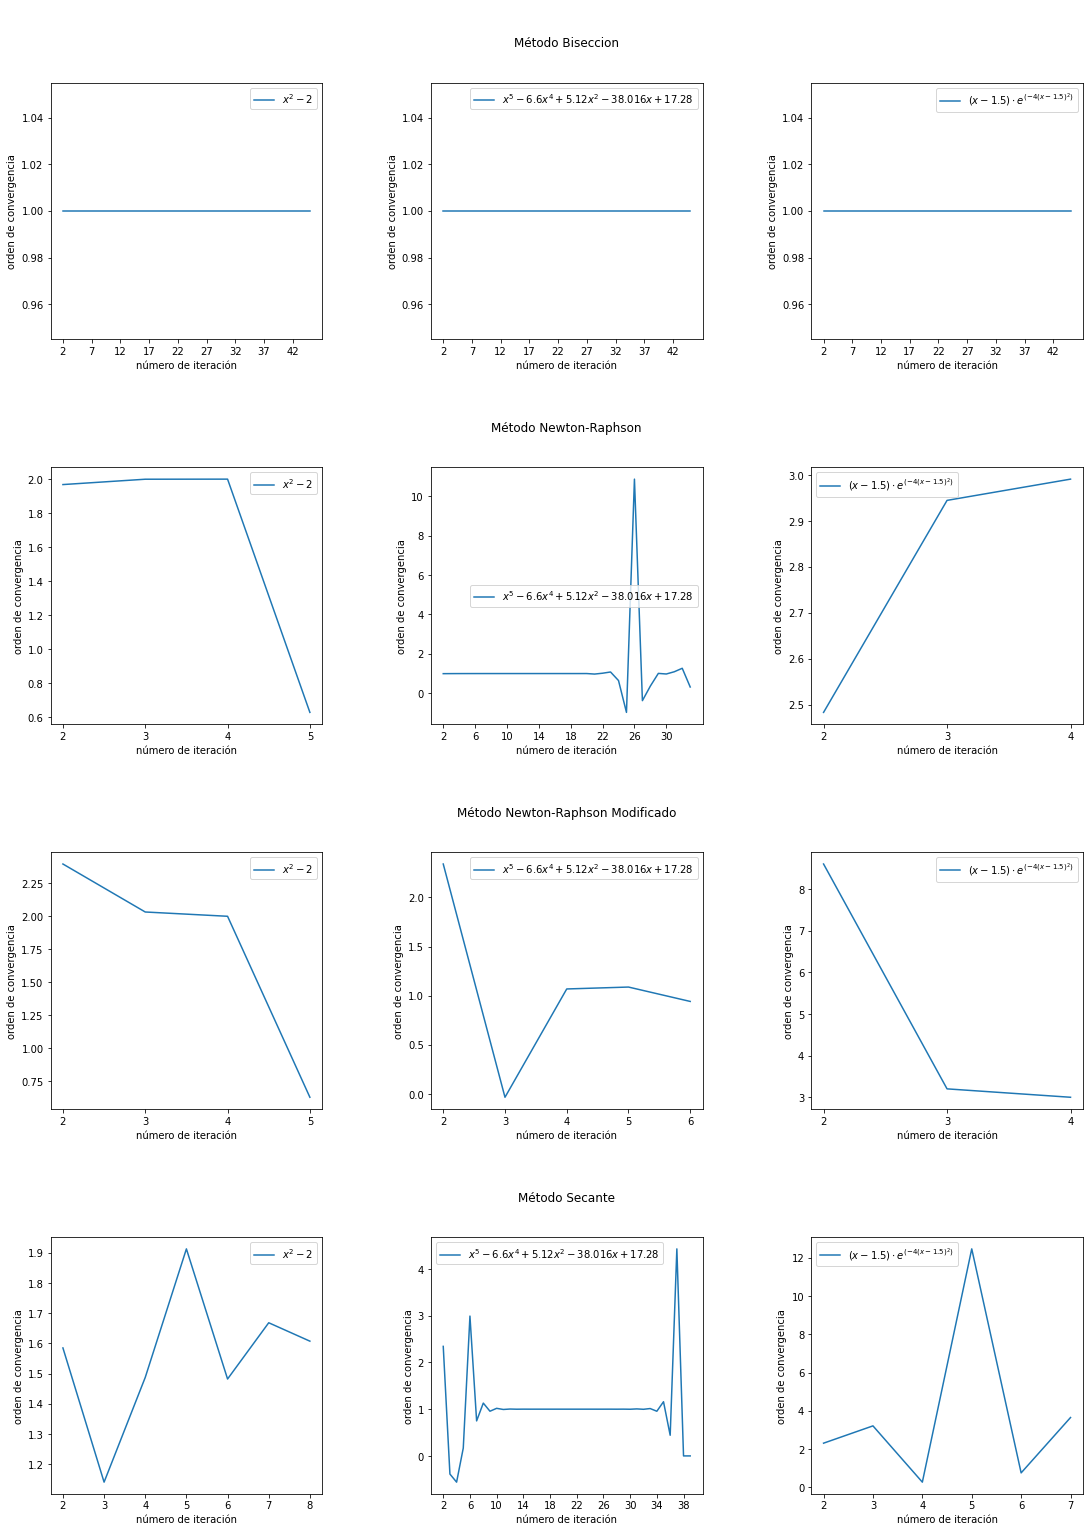

In [157]:
graficar(ordenes_convergencia, nombre = 'orden de convergencia')

#### Bisección

<p align = "justify">El orden de convergencia de la bisección dio exactamente igual a lo esperado. Siempre va a ser 1 ya que se trata de un método que iteración por iteración va reduciendo el error a la mitad linealmente, por lo que nunca va a variar.</p>

#### Newton-Raphson

<p align = "justify">En el caso de la primera y última función, estuvo bastante cerca del valor esperado de 2 (o incluso superior) durante la mayor parte de las iteraciones. </p>

<p align = "justify">En cuanto a la segunda función, se sostuvo más que nada alrededor de 1, que también era de esperar al ser una función con raíz doble con lo cual este método no mantiene la convergencia cuadrática.</p>

#### Newton-Raphson modificado

<p align = "justify">Para la primera y última función, nuevamente el orden estuvo alrededor de 2 como se esperaba.</p>

<p align = "justify">Aún así, en la segunda función esperabamos un orden de convergencia más cercano a 2 ya que se supone que este método mantiene convergencia cuadrática incluso cuando la raíz es múltiple. Es posible que esto se deba a la poca cantidad de iteraciones realizadas.</p>

#### Secante

<p align = "justify">La primera función tuvo un orden promediando entre 1 y 2, como es esperado, ya que debe ser mayor a 1 pero menor a 2 al aproximar la derivada con una recta secante.</p>

<p align = "justify">Para la segunda función, se mantuvo principalmente en 1 una vez más debido a la raíz múltiple de esta.</p>

<p align = "justify">Para la tercera, el orden oscilo en valores alrededor de 2, lo cual es un poco superior a lo esperado pero sigue estando dentro de un rango esperado.</p>

###Gráficos de constante asintótica

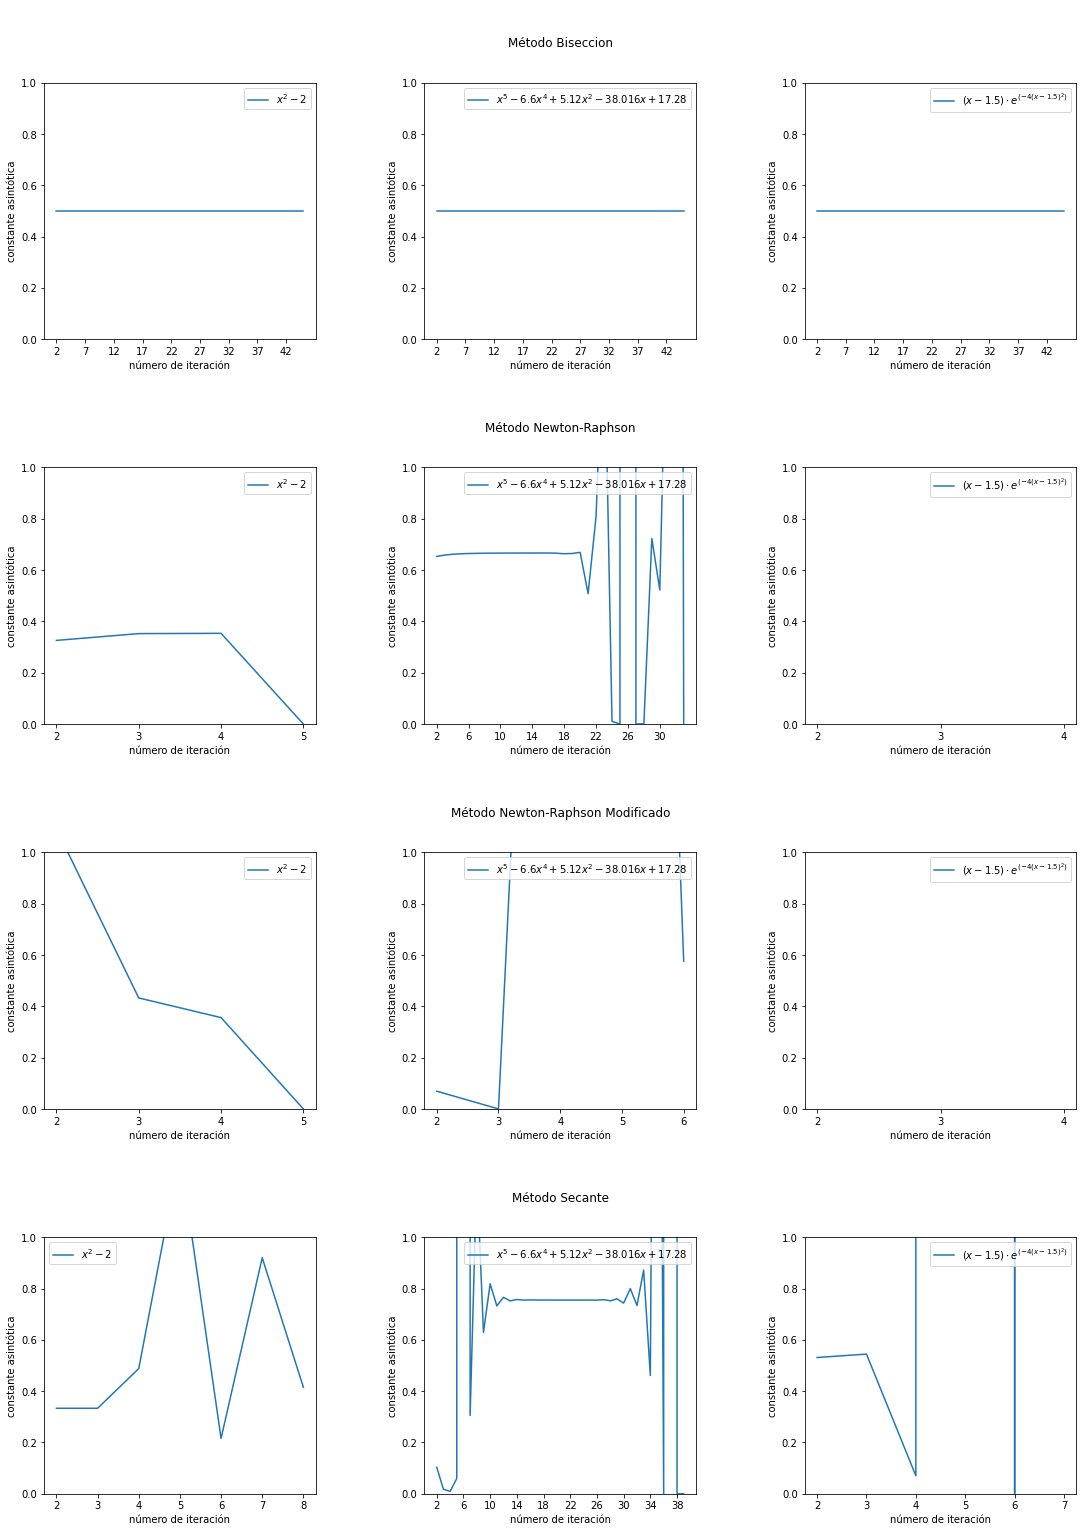

In [158]:
graficar(constante_asintotica,  nombre = 'constante asintótica', min = 0, max = 1)

#### Bisección

<p align = "justify">En este caso, la constante asintótica es la esperada ya que como el orden de convergencia es 1, esto significa que $\varepsilon_n = 0,5 \cdot \varepsilon_{n-1}$, lo cual es exactamente lo que hace el método: va dividiendo a la mitad el intervalo de búsqueda, por lo que el error lo hace también.</p>

#### Demás métodos

<p align = "justify">En cuanto a los otros métodos, la mayoría de las iteraciones lograron una constante asintótica entre 0 y 1, que es lo esperado, ya que implica que el error esta en efecto bajando con el orden de convergencia calculado.</p>

<p align = "justify">Forzamos la escala del eje y entre 0 y 1 para que se pueda apreciar esto, ya que había ciertas iteraciones con picos muy pronunciados que hacían que la escala se agrande mucho y parezca que la constante valía 0 en la mayoría de las iteraciones. Esto provocó que los gráficos de Newton-Raphson y Newton-Raphson modificado queden vacíos para la tercera función, ya que estaban dando valores por fuera de este rango.</p>

<p align = "justify">En aquellas iteraciones que se van de rango y en caso de las iteraciones con picos muy pronunciados, es bastante probable que se deban a la poca cantidad de iteraciones que se necesitaron para alcanzar el error buscado, lo que hace que las aproximaciones realizadas para el cálculo de la constante asintótica, que incluso arrastra también el error del orden de convergencia, no sean tan buenas. Calcular el valor real implicaría un limite con iteraciones tendiendo a infinito.</p>